# MCT4052 Workshop 7c: Autoencoder ANN

*Author: Stefano Fasciani, stefano.fasciani@imv.uio.no, Department of Musicology, University of Oslo.*

Autoencordes are a type of ANN used to learn efficient codings of unlabeled data. Autoencordes can be considered unsupervised ML applications of ANN. In this case the ANN is trained to produce at the output the same data presented at the input, through one (or more) hidden layers with lower dimensionality than the input/output layers. Therefore the autoencoder learns a representation (encoding, or latent space) for a set of data, which is typically used for dimensionality reduction or recoveryng of corrupted data (e.g. denoising or partially missing data).

Proper autoencoders should be implemented with deep-learning framework because they allow to customize the ANN architecture for each layer, while using scikit-learn is prossible to implement only fully connected feed-forward ANN. However, the basic principles, system design and applications of an autoencoder can still be achieved using scikit-learn (performances won't be great).

In this notebook we train an autoencoder (MLP regressor) with a collection of kick samples (all trimmed to the same lenght of 0.2 seconds), using a sampling rate of 48KHz. Then we use the sample to train an ANN regressor, to produce at the output the same kick samples presented at the input (same sequence of audio samples).

To demonstrate the concept, we listen and display the waveform of various input and output signals, such as kicks, corrupted kicks, and other percussive sounds.

In [1]:
import numpy as np
import pandas as pd
import librosa
import sklearn
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as ms
#ms.use("seaborn-v0_8")
import IPython.display as Ipd
import os

### 1. Loading raw audio segments into a n-dimensional array

In [2]:
#note that here we use the full audio rate
sr = 44100

filenames = os.listdir('./data/examples9')
rawdata = np.zeros((len(filenames),int(sr/5)))

for i in range(len(filenames)):
    temp , dummy = librosa.load('./data/examples9/'+filenames[i], sr=sr, mono=True, duration=0.2)
    #zero padding in case the signal is shorter than 8820 samples
    temp = librosa.util.fix_length(temp, size=8820)
    rawdata[i,:] = temp

    
print(rawdata.shape)
    
print('Done!')

(42, 8820)
Done!


### 2. Training a MLP regressor as a single layer autoencoder using the raw data as input and target output

In [3]:
#Import the classifier
from sklearn.neural_network import MLPRegressor

##Creating an instance of a MLP regressor
#and setting it some option (max mum epoch, verbose on, activation of neurons)
#we should use a much larger number of neurons in the hidden layer
#and use a few more hidden layers, but scikit learn is not computationally efficient
mlp = MLPRegressor(hidden_layer_sizes=(2000), max_iter=500, activation='logistic', tol=1e-5, verbose=True)

#train the model
#note as input and output are identical
mlp.fit(rawdata, rawdata)


Iteration 1, loss = 0.05604605
Iteration 2, loss = 0.34200156
Iteration 3, loss = 0.06697386
Iteration 4, loss = 0.07624181
Iteration 5, loss = 0.15980825
Iteration 6, loss = 0.15125049
Iteration 7, loss = 0.09060502
Iteration 8, loss = 0.04405411
Iteration 9, loss = 0.03451000
Iteration 10, loss = 0.05070990
Iteration 11, loss = 0.06925683
Iteration 12, loss = 0.07381848
Iteration 13, loss = 0.06300367
Iteration 14, loss = 0.04545478
Iteration 15, loss = 0.03089255
Iteration 16, loss = 0.02454515
Iteration 17, loss = 0.02609904
Iteration 18, loss = 0.03146774
Iteration 19, loss = 0.03575083
Iteration 20, loss = 0.03596370
Iteration 21, loss = 0.03212022
Iteration 22, loss = 0.02636335
Iteration 23, loss = 0.02126155
Iteration 24, loss = 0.01846950
Iteration 25, loss = 0.01822271
Iteration 26, loss = 0.01957748
Iteration 27, loss = 0.02109774
Iteration 28, loss = 0.02162481
Iteration 29, loss = 0.02077215
Iteration 30, loss = 0.01893840
Iteration 31, loss = 0.01691945
Iteration 32, los

MLPRegressor(activation='logistic', hidden_layer_sizes=2000, max_iter=500,
             tol=1e-05, verbose=True)

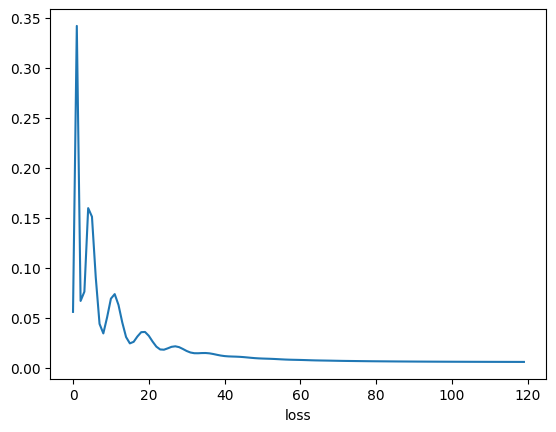

Coefficient of determination (r2 score): 0.9852


In [4]:
#plotting the loss curve over training iteration 
plt.plot(mlp.loss_curve_)
plt.xlabel('iteration')
plt.xlabel('loss')
plt.show()

#applying the the model on the test data (features)
prediction = mlp.predict(rawdata)

#coefficient of determination (r2 score): 1 is perfect prediction (it can get arbitrary negative)
print('Coefficient of determination (r2 score): %.4f'% sklearn.metrics.r2_score(rawdata, prediction))

### 3. Testing the autoencoder with different input signals

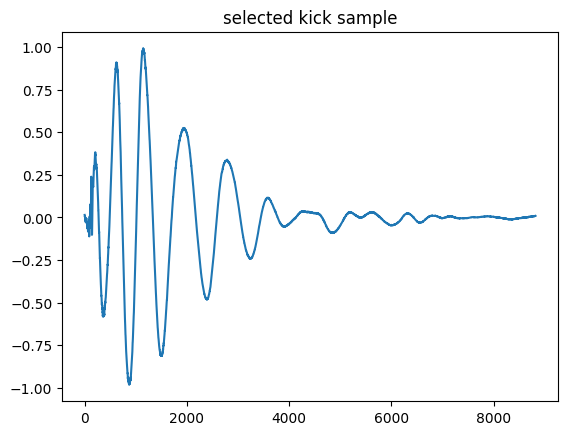

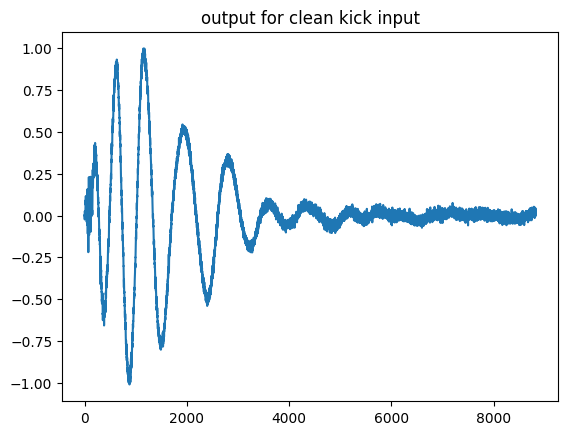

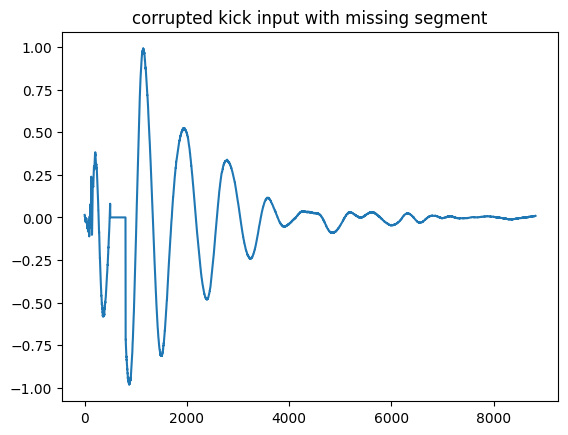

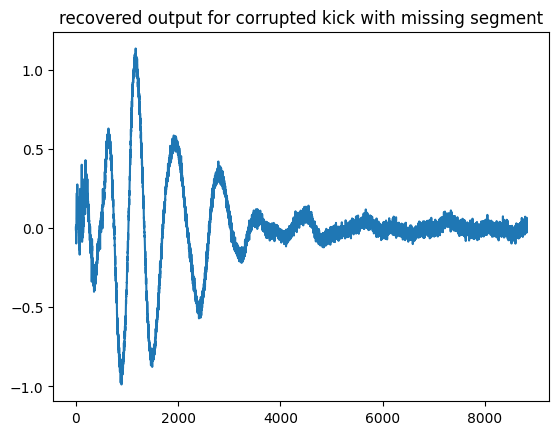

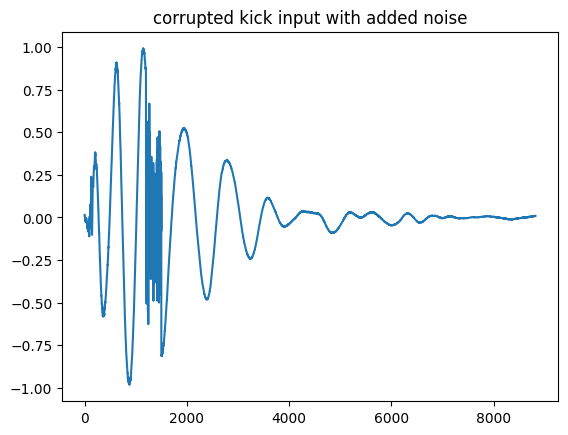

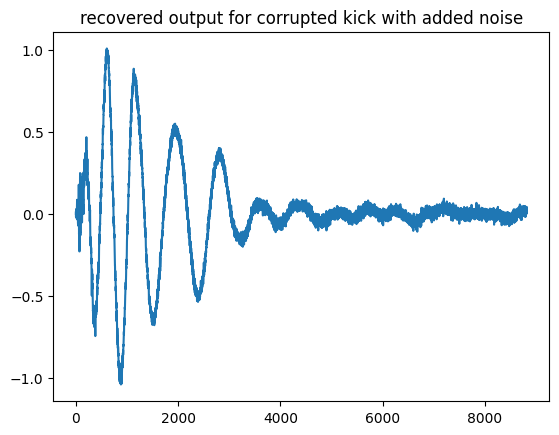

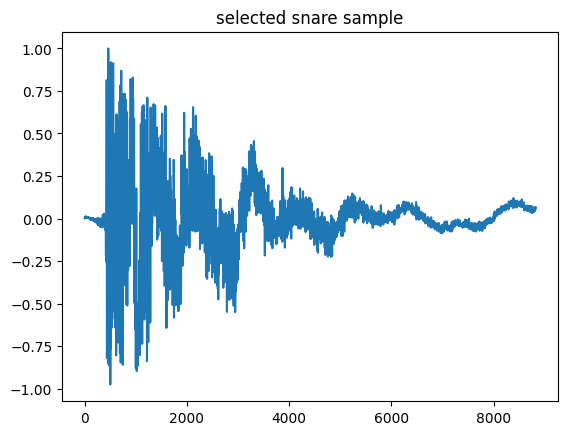

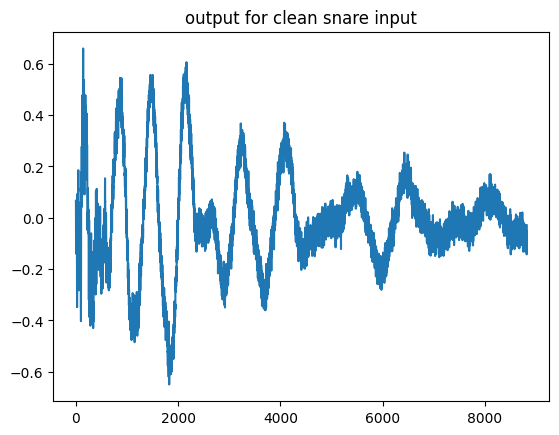

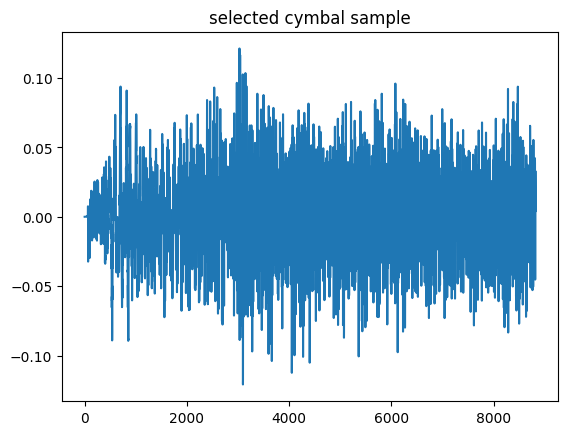

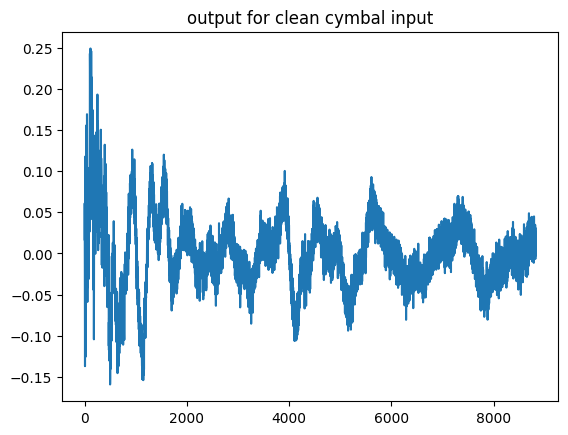

In [5]:
#change the sample ID to take another kick sample from the database
sample_ID = 30
original = np.copy(rawdata[sample_ID,:])

plt.plot(original)
plt.title('selected kick sample')
plt.show()
Ipd.display(Ipd.Audio(original, rate=sr))

recovered1 = mlp.predict(original.reshape(1,-1))
plt.plot(recovered1.flatten())
plt.title('output for clean kick input')
plt.show()
Ipd.display(Ipd.Audio(recovered1.flatten(), rate=sr))

#corrupting by removing a segment and recovering 
corrupted1 = np.copy(original)
corrupted1[500:800]=0;

plt.plot(corrupted1)
plt.title('corrupted kick input with missing segment')
plt.show()
Ipd.display(Ipd.Audio(corrupted1, rate=sr))

recovered1 = mlp.predict(corrupted1.reshape(1,-1))
plt.plot(recovered1.flatten())
plt.title('recovered output for corrupted kick with missing segment')
plt.show()
Ipd.display(Ipd.Audio(recovered1.flatten(), rate=sr))

#corrupting by adding a noise segment and recovering 
corrupted2 = np.copy(original)
corrupted2[1200:1500]=np.random.normal(0,0.2,(1,300));

plt.plot(corrupted2)
plt.title('corrupted kick input with added noise')
plt.show()
Ipd.display(Ipd.Audio(corrupted2, rate=sr))

recovered2 = mlp.predict(corrupted2.reshape(1,-1))
plt.plot(recovered2.flatten())
plt.title('recovered output for corrupted kick with added noise')
plt.show()
Ipd.display(Ipd.Audio(recovered2.flatten(), rate=sr))

#testing with different percussive sound at the input (you can change the filename).
#loading with zero padding if the input file is shorter
snare, dummy = librosa.load('./data/examples2/snare_24.wav', sr=sr, mono=True, duration=0.2)
cymbal, dummy = librosa.load('./data/examples2/cymbal36.wav', sr=sr, mono=True, duration=0.2)

snare = librosa.util.fix_length(snare, size=8820)
cymbal = librosa.util.fix_length(cymbal, size=8820)

plt.plot(snare)
plt.title('selected snare sample')
plt.show()
Ipd.display(Ipd.Audio(snare, rate=sr))

out = mlp.predict(snare.reshape(1,-1))
plt.plot(out.flatten())
plt.title('output for clean snare input')
plt.show()
Ipd.display(Ipd.Audio(out.flatten(), rate=sr))

plt.plot(cymbal)
plt.title('selected cymbal sample')
plt.show()
Ipd.display(Ipd.Audio(cymbal, rate=sr))

out = mlp.predict(cymbal.reshape(1,-1))
plt.plot(out.flatten())
plt.title('output for clean cymbal input')
plt.show()
Ipd.display(Ipd.Audio(out.flatten(), rate=sr))

### 4. Follow up activities

1. Replace the MLPRegressor with a Tensorflow Dense ANN (use keras.sequential)
 
2. Train the autoencoder using the spectrogram (or mel spectrogram) of the audio samples (instead of working with raw audio samples), and then invert the spectrogram into audio using [librosa.feature.inverse.mel_to_audio](https://librosa.org/doc/main/generated/librosa.feature.inverse.mel_to_audio.html)